In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')

from lib import AssetManager


In [2]:
import os

OUTPUT_DIR = '/home/azureuser/cloudfiles/code/output'
PROBLEM_PREFIX = 'IridiumDataSet14day20sec'

INTENSITY_LIST = ['5', '7p5', '10', '12p5', '15']
TEAL_OUTPUT_LIST = [os.path.join(OUTPUT_DIR, f'{PROBLEM_PREFIX}_Int{intensity}_teal') for intensity in INTENSITY_LIST]
LP_OUTPUT_LIST = [os.path.join(OUTPUT_DIR, f'{PROBLEM_PREFIX}_Int{intensity}_lp') for intensity in INTENSITY_LIST]
SATE_OUTPUT_LIST = [os.path.join(OUTPUT_DIR, f'{PROBLEM_PREFIX}_Int{intensity}_spaceTE_new') for intensity in INTENSITY_LIST]

In [4]:
# Create datafrmames
import pandas as pd

TEAL_TEST_LOG_FNAME = 'teal_topo-300_tsz-None_vr-0.2_lr-0.0001_ep-3_bsz-20_layer-6_sample-5_rho-1.0_step-5.csv'
LP_TEST_LOG_FNAME = 'gurobi_topo-300_tsz-None.csv'
SATE_TEST_LOG_FNAME = 'spaceTE_topo-300_tsz-None_vr-0.2_lr-0.0001_ep-3_bsz-32_sample-5_rho-1.0_step-5_quantized-False_compiled-False.csv'

teal_df_list = [pd.read_csv(os.path.join(AssetManager.test_log_dir(output), TEAL_TEST_LOG_FNAME)) \
    for output in TEAL_OUTPUT_LIST]
lp_df_list = [pd.read_csv(os.path.join(AssetManager.test_log_dir(output), LP_TEST_LOG_FNAME)) \
    for output in LP_OUTPUT_LIST]
sate_df_list = [pd.read_csv(os.path.join(AssetManager.test_log_dir(output), SATE_TEST_LOG_FNAME)) \
    for output in SATE_OUTPUT_LIST]

algo_df_dict = {
    'TEAL': teal_df_list,
    'LP': lp_df_list,
    'SATE': sate_df_list
}

In [12]:
lp_df = lp_df_list[0]
lp_df.groupby('topo_idx').mean().iloc[0:24]

,tm_idx,total_demand,obj_val,ratio,runtime
topo_idx,,,,,
0,14.5,327.905600,321.659467,0.983315,0.002518
1,14.5,326.359067,321.662933,0.987182,0.002434
2,14.5,328.925733,322.867200,0.984054,0.002495
3,14.5,323.071067,318.733267,0.988285,0.002502
4,14.5,320.136000,315.626200,0.987307,0.002414
5,14.5,319.974000,314.553733,0.984582,0.002405
6,14.5,325.855600,319.932133,0.983140,0.002459
7,14.5,324.094533,318.612933,0.984884,0.002472
8,14.5,327.719733,317.325733,0.970145,0.002578


In [11]:
sate_df = sate_df_list[0]
sate_df.groupby('topo_idx').mean()

,tm_idx,total_demand,obj_val,ratio,runtime
topo_idx,,,,,
0,74.5,327.905588,274.532159,0.842300,0.039403
1,134.5,326.359053,275.150092,0.846780,0.038736
2,194.5,328.925720,275.096784,0.841483,0.038953
3,404.5,323.071058,270.870490,0.844267,0.039298
4,644.5,320.135993,268.346576,0.844259,0.038892
5,284.5,319.973990,267.016280,0.841727,0.038799
6,464.5,325.855591,273.242527,0.845335,0.038791
7,44.5,324.094523,269.406463,0.838678,0.038695
8,614.5,327.719722,268.471346,0.827426,0.038812


## Relative Throughput CDF (Among Topologies)

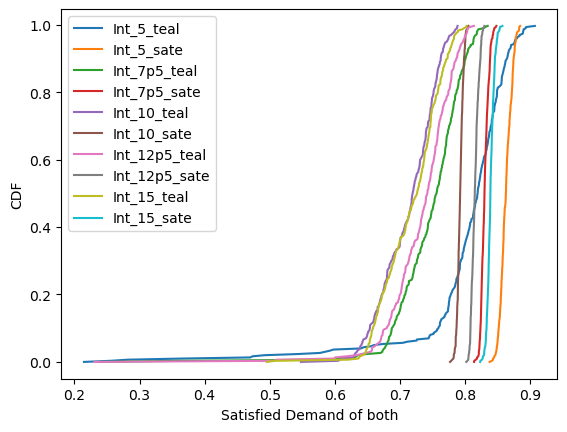

In [5]:
def draw_rel_tput_cdf(model):
    plt.clf()
    
    for i in range(len(INTENSITY_LIST)):
        teal_df = teal_df_list[i]
        sate_df = sate_df_list[i]
        lp_df = lp_df_list[i]
        rel_tput1 = teal_df.groupby('topo_idx')['obj_val'].mean() / lp_df.groupby('topo_idx')['obj_val'].mean()
        rel_tput2 = sate_df.groupby('topo_idx')['obj_val'].mean() / lp_df.groupby('topo_idx')['obj_val'].mean()
            
        sorted_data1 = np.sort(rel_tput1)
        sorted_data2 = np.sort(rel_tput2)

        yvals = np.arange(len(sorted_data1))/float(len(sorted_data1))
        if model == 'teal':
            plt.plot(sorted_data1, yvals, label=f'Int_{INTENSITY_LIST[i]}_teal')
        elif model == 'sate':
            plt.plot(sorted_data2, yvals, label=f'Int_{INTENSITY_LIST[i]}_sate')
        elif model == 'both':            
            plt.plot(sorted_data1, yvals, label=f'Int_{INTENSITY_LIST[i]}_teal')
            plt.plot(sorted_data2, yvals, label=f'Int_{INTENSITY_LIST[i]}_sate')


        
    plt.xlabel(f'Satisfied Demand of {model}')
    plt.ylabel('CDF')
    plt.legend()
    plt.show()
    
draw_rel_tput_cdf('both')
    

<Figure size 640x480 with 0 Axes>

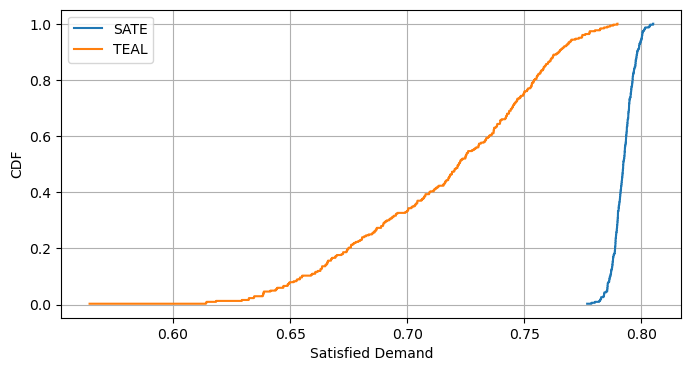

In [6]:
def draw_rel_tput_cdf():
    plt.clf()
    
    
    teal_df = pd.read_csv('/home/azureuser/cloudfiles/code/output/IridiumDataSet14day20sec_Int10_teal/test_logs/teal_topo-300_tsz-None_vr-0.2_lr-0.0001_ep-5_bsz-20_layer-6_sample-5_rho-1.0_step-5.csv')

    sate_df = pd.read_csv('/home/azureuser/cloudfiles/code/output/IridiumDataSet14day20sec_Int10_spaceTE_new/test_logs/spaceTE_topo-300_tsz-None_vr-0.2_lr-0.0001_ep-3_bsz-32_sample-5_rho-1.0_step-5_quantized-False_compiled-False.csv')
    sate_df['tm_idx'] = sate_df['tm_idx'] % 30
    sate_df.sort_values(by=['topo_idx', 'tm_idx'], inplace=True)

    lp_df = pd.read_csv('/home/azureuser/cloudfiles/code/output/IridiumDataSet14day20sec_Int10_lp/test_logs/gurobi_topo-300_tsz-None.csv')
    
    sate_df['data'] = sate_df.groupby('topo_idx')['obj_val'].mean() / lp_df.groupby('topo_idx')['obj_val'].mean()
    teal_df['data'] = teal_df.groupby('topo_idx')['obj_val'].mean() / lp_df.groupby('topo_idx')['obj_val'].mean()

    sorted_data1 = sate_df.sort_values(by='data')
    sorted_data2 = teal_df.sort_values(by='data')

    # Calculate the CDF values
    sorted_data1['cdf'] = sorted_data1['data'].rank(method='average', pct=True)
    sorted_data2['cdf'] = sorted_data2['data'].rank(method='average', pct=True)

    # Plotting the CDF
    plt.figure(figsize=(8, 4))
    plt.step(sorted_data1['data'], sorted_data1['cdf'], where='post', label='SATE')
    plt.step(sorted_data2['data'], sorted_data2['cdf'], where='post', label='TEAL')
    plt.grid(True)
    plt.xlabel('Satisfied Demand')
    plt.ylabel('CDF')
    plt.legend()
    plt.show()
    
draw_rel_tput_cdf()
    

## Throughput v.s. Traffic Load

<Figure size 640x480 with 0 Axes>

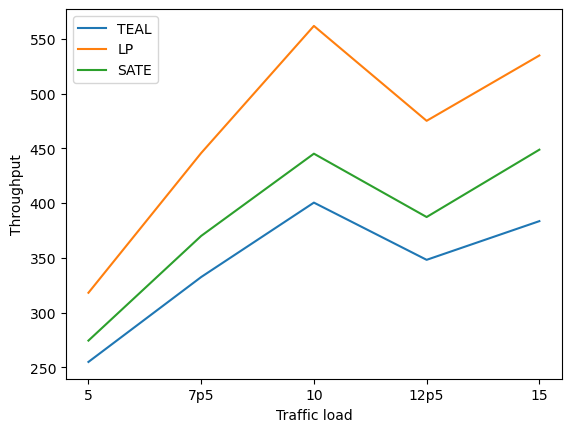

In [7]:

def draw_throughtput_vs_traffic_load():
    algo_tput_list = {
        key: [df['obj_val'].mean() for df in df_list] for key, df_list in algo_df_dict.items()
    }
    
    plt.clf()
    fix, ax = plt.subplots()
    
    for key, tput_list in algo_tput_list.items():
        ax.plot(INTENSITY_LIST, tput_list, label=key)
    ax.set_xlabel('Traffic load')
    ax.set_ylabel('Throughput')
    ax.legend()
    
    plt.show()
    
draw_throughtput_vs_traffic_load()
    

<Figure size 640x480 with 0 Axes>

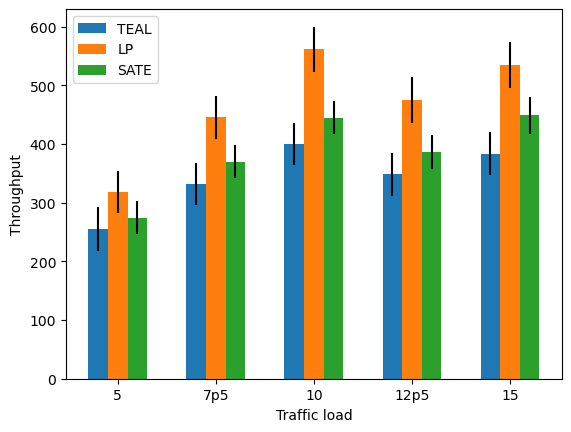

In [8]:
import matplotlib.pyplot as plt

def draw_throughtput_vs_traffic_load():
    algo_tput_list = {
        key: [df['obj_val'].mean() for df in df_list] for key, df_list in algo_df_dict.items()
    }
    algo_tput_std = {
        key: [df['obj_val'].std() for df in df_list] for key, df_list in algo_df_dict.items()
    }
    
    plt.clf()
    fig, ax = plt.subplots()
    
    x = range(len(INTENSITY_LIST))
    width = 0.2  # Width of the bars

    for i, (key, tput_list) in enumerate(algo_tput_list.items()):
        std_list = algo_tput_std[key]
        ax.bar([xi + i * width for xi in x], tput_list, width, yerr=std_list, label=key)

    ax.set_xlabel('Traffic load')
    ax.set_ylabel('Throughput')
    ax.set_xticks([xi + width for xi in x])
    ax.set_xticklabels(INTENSITY_LIST)
    ax.legend()
    
    plt.show()
    
draw_throughtput_vs_traffic_load()

## Inference Time

{'TEAL': [0.02271998997087827, 0.023032116919387956, 0.023298129358409313, 0.02212594138251406, 0.02208639477506091], 'LP': [0.0024386838336049282, 0.004125045611534541, 0.006690535368742718, 0.004669555528664246, 0.0060223159966644926], 'SATE': [0.016163939723262032, 0.016199437777201287, 0.016236489849326, 0.01604094390515923, 0.016346856399818654]}


<Figure size 640x480 with 0 Axes>

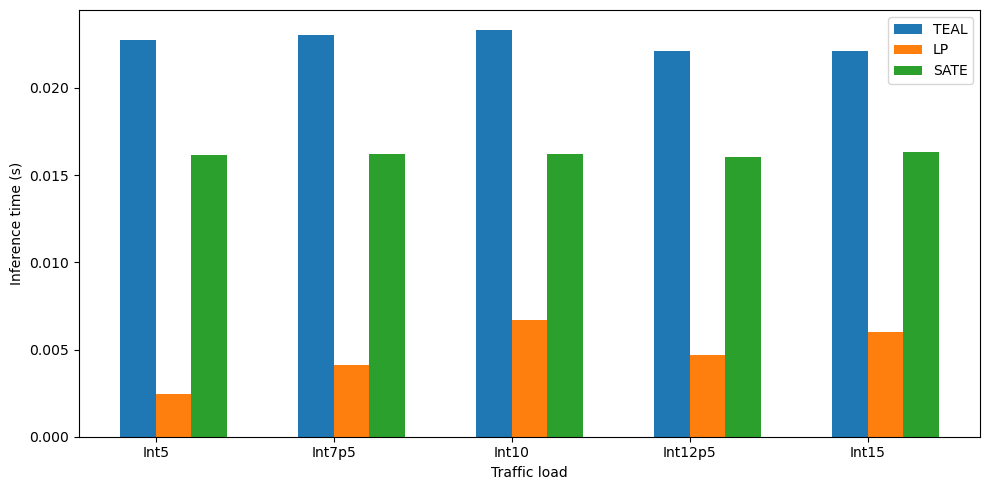

In [9]:
from scipy import stats

def draw_inference_time():
    BAR_WIDTH = 0.2
    
    algo_inference_time = {
        algo: [stats.trim_mean(df['runtime'], 0.05) for df in df_list] \
            for algo, df_list in algo_df_dict.items()
    }

    print(algo_inference_time)
    
    plt.clf()
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(INTENSITY_LIST))
    for i, algo in enumerate(algo_df_dict.keys()):
        ax.bar(x + i * BAR_WIDTH, algo_inference_time[algo], width=BAR_WIDTH, label=algo)
    
    ax.set_xlabel('Traffic load')
    ax.set_ylabel('Inference time (s)')
    ax.set_xticks([v + BAR_WIDTH/2 for v in x])
    ax.set_xticklabels([f'Int{intensity}' for intensity in INTENSITY_LIST])
    ax.legend()
    fig.tight_layout()
    plt.show()
    
draw_inference_time()

In [11]:
import torch
import time

load_time = 0
for i in range(1000) :
    start_time = time.time()
    model = torch.load('/home/azureuser/cloudfiles/code/output/IridiumDataSet14day20sec_Int5_teal/models/0/teal_topo-300_tsz-None_vr-0.2_lr-0.0001_ep-5_bsz-20_layer-6_sample-5_rho-1.0_step-5.pt')
    loading_time = time.time() - start_time
    load_time += loading_time

print(f"Model loaded in {load_time/1000} seconds")


Model loaded in 0.0067365760803222655 seconds
